## Projeto Simples de Machine Learning

Fazendo um modelo de classificação para predizer se um vinho é tinto ou branco em um banco de dados.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
wine = pd.read_csv('wine_dataset.csv')

In [27]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Verificando a distribuição de classes de vinhos

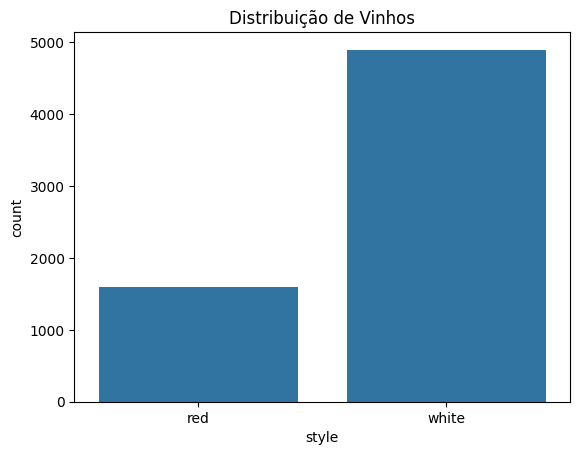

In [28]:
sns.countplot(x='style', data=wine)
plt.title('Distribuição de Vinhos')
plt.show()

In [31]:
# Transformando dados categóricos em numéricos
def label_encoder_column(df, column_to_encode):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    if column_to_encode in df.columns:
        df[column_to_encode] = le.fit_transform(df[column_to_encode])
    else:
        print(f"A coluna {column_to_encode} não existe no DataFrame.")
    return df

coluna_a_codificar = 'style'
wine = label_encoder_column(wine, coluna_a_codificar)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Agora, o vinho tinto (_red_) é codificado com 0 e o vinho branco (_white_) está codificado como 1

#### Plotando um mapa de calor para verificar a correlação das variáveis

<Figure size 1200x800 with 0 Axes>

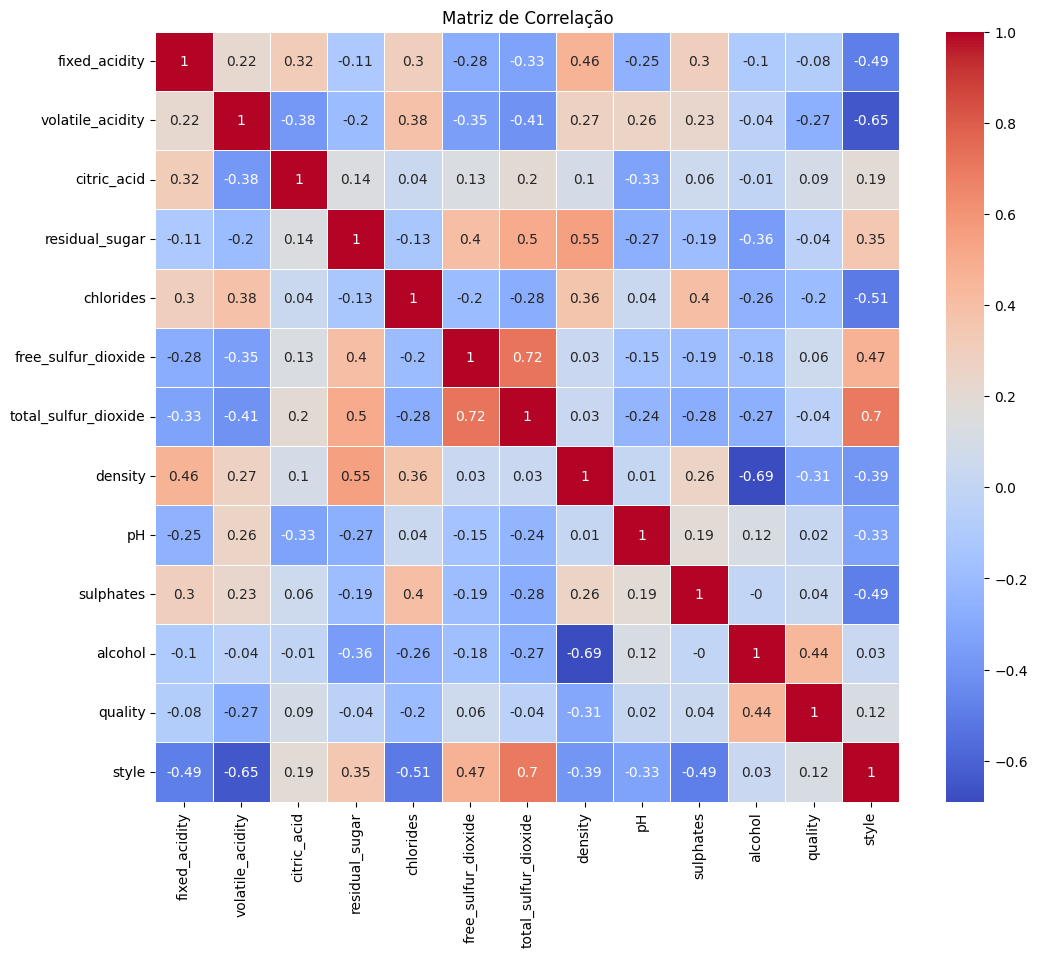

In [32]:
plt.figure(figsize=(12, 8))
correlation_matrix = wine.corr().round(2)

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='coolwarm', ax=ax)
plt.title('Matriz de Correlação')
plt.show()

In [7]:
# Separando as variáveis entre preditoras e variável alvo
y = wine['style']
x = wine.drop('style', axis = 1) # todas as colunas tirando a style

In [11]:
x.shape

(6497, 12)

Separando as variáveis entre treino e teste do algoritmo

In [8]:
from sklearn.model_selection import train_test_split

#criando os conjuntos de dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [13]:
x_treino.shape #70%

(4547, 12)

In [18]:
x_teste.shape #30%

(1950, 12)

## Criando o modelo de ML

Usando um algoritmo de árvore de decisão para classificar o conjunto de dados

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

#Criando o modelo

model = ExtraTreesClassifier()
model.fit(x_treino, y_treino) # aplicando

resultado = model.score(x_teste, y_teste)
print("Acurácia:", resultado)

Acurácia: 0.9958974358974358


Filtrando algumas amostras que não foram usadas para treinar o modelo apenas para visualizar na prática a classificação sendo feita

In [20]:
y_teste[400:403]

,style
4586,1
5557,1
2908,1


In [21]:
x_teste[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4586,6.8,0.180,0.28,9.8,0.039,29.0,113.0,0.99406,3.11,0.45,10.9,7
5557,5.6,0.185,0.19,7.1,0.048,36.0,110.0,0.99438,3.26,0.41,9.5,6
2908,9.4,0.170,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6


Pegando o modelo que já foi treinado para prever a pequena amostra

In [22]:
previsoes = model.predict(x_teste[400:403])

In [23]:
previsoes

array([1, 1, 1])

Acertou! :)

## Outro algoritmo de ML - Random Forest


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_treino, y_treino)
rf_accuracy = rf_model.score(x_teste, y_teste)
print("Acurácia com Random Forest:", rf_accuracy)

Acurácia com Random Forest: 0.9943589743589744


## Usando outras métricas de desempenho

In [35]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_teste)
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       502
           1       1.00      1.00      1.00      1448

    accuracy                           1.00      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950

